# Collar

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [34]:
# Random Stock Price
spot_price = 70.65 

# Long put
strike_price_long_put = 65 
premium_long_put = 2

# Short call
strike_price_short_call = 75 
premium_short_call = 3.25

# Stock price range at expiration of the put
sT = np.arange(0,2*spot_price,1) 

# Call payoff
We define a function that calculates the payoff from buying a call option. The function takes sT which is a range of possible values of stock price at expiration, strike price of the call option and premium of the call option as input. It returns the call option payoff.

In [35]:
def call_payoff(sT, strike_price, premium):
    return np.where(sT < strike_price, premium,+ premium -sT + strike_price) 

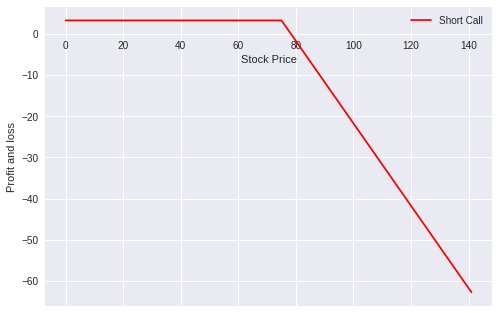

In [36]:
payoff_short_call = call_payoff (sT, strike_price_short_call, premium_short_call)
# Plot
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed 
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center
ax.plot(sT,payoff_short_call,label='Short Call',color='r')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

# Put payoff
We define a function that calculates the payoff from buying a put option. The function takes sT which is a range of possible values of stock price at expiration, strike price of the put option and premium of the put option as input. It returns the put option payoff.

In [37]:
def put_payoff(sT, strike_price, premium):
    return np.where(sT < strike_price, strike_price - sT, 0) - premium 

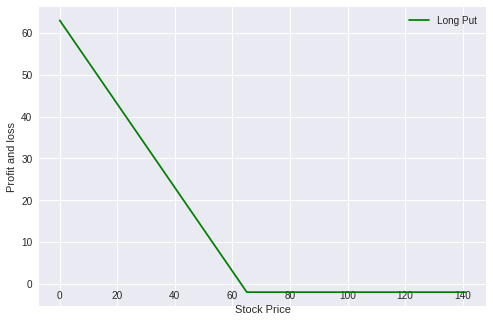

In [38]:
payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)
# Plot
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed 
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center
ax.plot(sT,payoff_long_put,label='Long Put',color='g')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

# Collar payoff

Max Profit: 66.25
Max Loss: -64.75


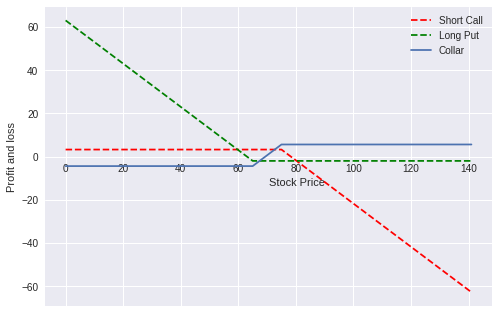

In [42]:
payoff_collar = payoff_short_call + payoff_long_put

print ("Max Profit:", max(payoff_collar))
print ("Max Loss:", min(payoff_collar))
# Plot
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed 
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center

ax.plot(sT,payoff_short_call,'--',label='Short Call',color='r')
ax.plot(sT,payoff_long_put,'--',label='Long Put',color='g')

ax.plot(sT,payoff_collar+sT-spot_price,label='Collar')
plt.xlabel('Stock Price', ha='left')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()